# **Data Extraction**

## Objectives

* Fetch raw data file from [Kaggle](https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance)
*  Analyse raw data to determine requirements for cleaning and transformation
*  Create new CSV file with cleaned and transformed data

## Inputs

*  The insurance.csv file downloaded from the above source and stored in the Datasets/Raw folder

## Outputs

* A new dataset csv with cleaned and transformed data, with some basic visualisations of data using Matplotlib

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [ ]:
import os
current_dir = os.getcwd()
current_dir

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

Confirm the new current directory

In [ ]:
current_dir = os.getcwd()
current_dir

# Analyse Raw Data

Import Packages and Load Insurance.csv

In [8]:
#import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


---

In [9]:
#load raw insurance data
raw_df = pd.read_csv("../datasets/raw/insurance.csv")
raw_df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Begin initial analysis of data to determine further actions

In [10]:
#Check data info
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
#check for missing values
raw_df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
raw_df.isna().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
region              0
charges             0
bmi_category        0
charges_category    0
dtype: int64

In [ ]:
#check for duplicates
raw_df.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

In [22]:
#show duplicates
raw_df[raw_df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,bmi_category,charges_category
581,19,male,30.59,0,no,northwest,1639.5631,Obese,Low


In [ ]:
##drop single duplicated value - to keep the first occurrence
raw_df.drop_duplicates(inplace=True)
raw_df


,age,sex,bmi,children,smoker,region,charges,bmi_category,charges_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Medium
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Low
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Low
3,33,male,22.705,0,no,northwest,21984.47061,Normal,High
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Low
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese,Medium
1334,18,female,31.920,0,no,northeast,2205.98080,Obese,Low
1335,18,female,36.850,0,no,southeast,1629.83350,Obese,Low
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight,Low


As there are no null values, proceed to analyse data to see which transformation are necessary.

# Data Transformation

Basic Visualisations to guide process of transformation

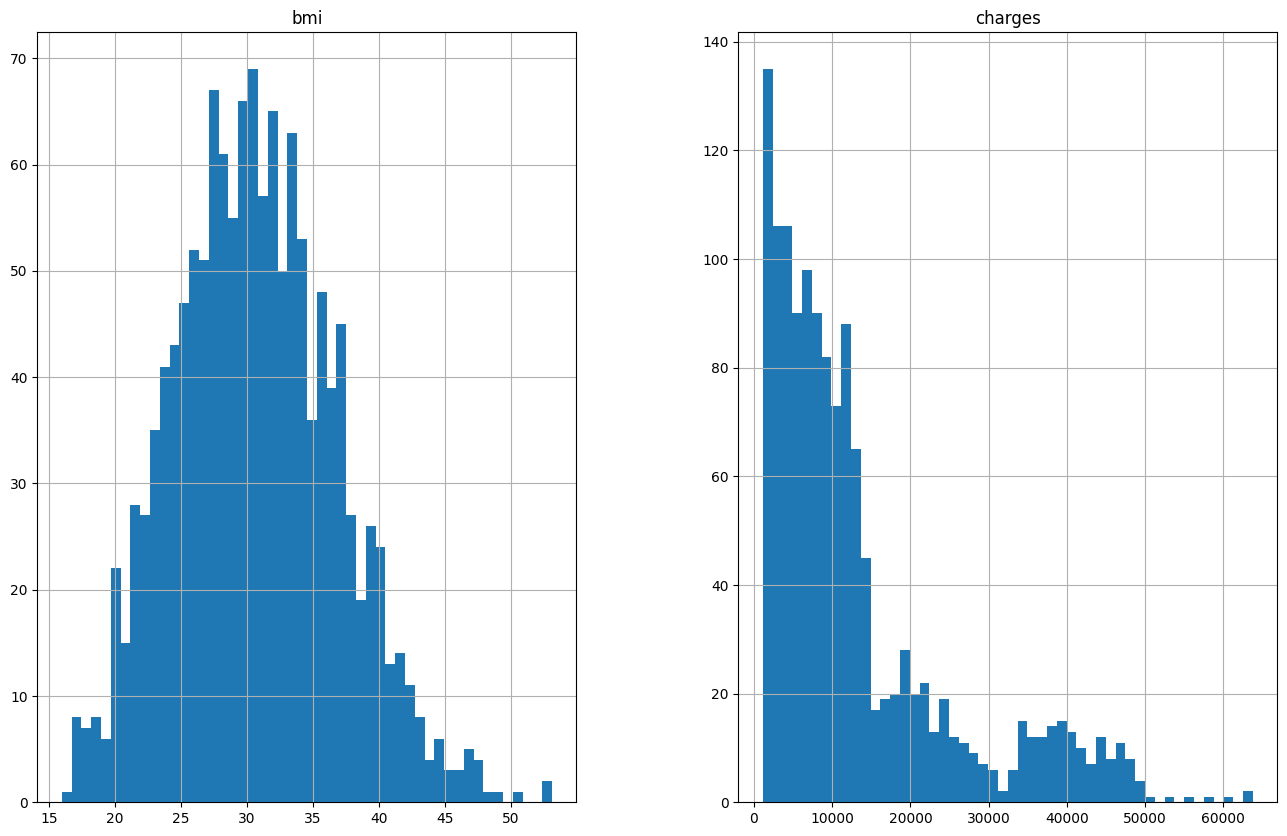

In [24]:
## plot charts to look at BMI and charges information
plot = raw_df[['bmi', 'charges']].hist(bins=50, figsize=(16,10))

### Analysis of bmi and charges data
As these are the areas of most interest to this project I will add columns to the data showing these as categories.
For the bmi I have used information from [AmericanCancerSociety](https://www.cancer.org/cancer/risk-prevention/diet-physical-activity/body-weight-and-cancer-risk/body-mass-index-bmi-calculator.html) as a guide to categorization (NHS guidelines are slighly different). The categories for bmi classification are:
*   Underweight: BMI is less than 18.5
*   Normal weight: BMI is 18.5 to 24.9
*   Overweight: BMI is 25 to 29.9
*   Obesity: BMI is 30 or more

For charges data I have used the data from the survey to classify as follows:
*   0-15000  low
*   15000-30000 medium
*   30000-50000 high
*   0ver 50000 very high (I decided to add this category as there are a number of outliers over 50000)

In [30]:
##functions for encoding bmi and price data
def encode_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Healthy'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

def encode_charges(charges):
    if charges < 10000:
        return 'Low'
    elif 10000 <= charges < 20000:
        return 'Medium'
    elif 20000 <= charges < 30000:
        return 'High'
    else:
        return 'Very High'


In [31]:
##apply encoding functions - as these are applied to columns have used apply instead of pipe
raw_df['bmi_category'] = raw_df['bmi'].apply(encode_bmi)
raw_df['charges_category'] = raw_df['charges'].apply(encode_charges)
raw_df.head()


,age,sex,bmi,children,smoker,region,charges,bmi_category,charges_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Medium
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Low
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Low
3,33,male,22.705,0,no,northwest,21984.47061,Healthy,High
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Low


---

### Plot counts of new categories, bmi_category and charges_category

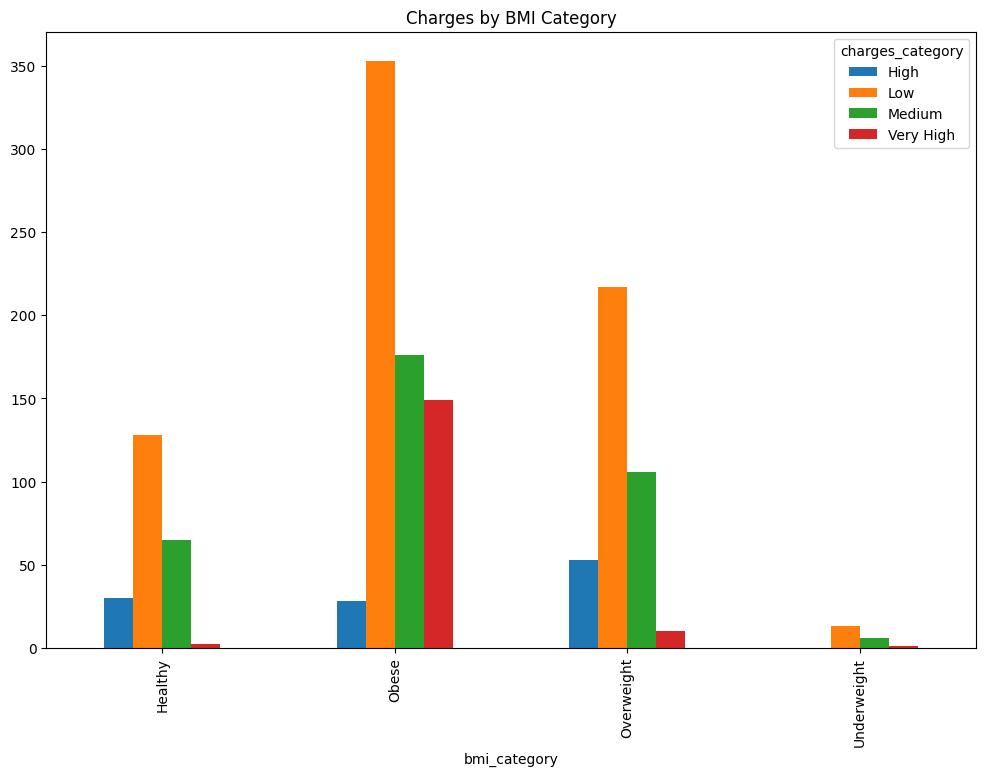

In [33]:
#plot bmi_category and charges_category
plot = raw_df[['bmi_category', 'charges_category']].value_counts().unstack().plot(kind='bar', figsize=(12,8),title="Charges by BMI Category")

As can be seen by the above chart, while charges are generally low across categories there is a significant increase in very high charges in the Obese category. 

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
